<a href="https://colab.research.google.com/github/castudil/sensor-data-analysis/blob/main/source/sensor-data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ESTIMACIÓN DE LA FRECUENCIA RESPIRATORIA A PARTIR DE MEDICIONES DE DIÓXIDO DE CARBONO

## Resumen

**Contexto:** El siguiente Jupiter notebook contiene un código en Python que realiza un análisis de series de tiempo de dióxido de carbono obtenidos por sensores.

**Objetivo:** Deducir la tasa de respiración de seres humanos.

**Metodo:** Se utiliza la metodología OSEMN para el ciclo de vida de ciencia de datos.


# STEP 1: OBTAIN DATA


[Tutorial de Time series util
](https://machinelearningmastery.com/time-series-data-visualization-with-python/)

Los datos fueron guardados en formato CSV y luego almacenados directamente en el repositorio de Google colab.

Los datos consta de dos columnas: en la primera columna contiene mediciones de tiempo mientras que la segunda niveles de CO2.


Los parámetros del archivo CSV permiten cargar directamente una serie de tiempo.


Parametros extraidos de la [documentacion](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

**squeeze**: bool, default False
If the parsed data only contains one column then return a Series.


**parse_dates**:  For non-standard datetime parsing, use pd.to_datetime after pd.read_csv. To parse an index or column with a mixture of timezones, specify date_parser to be a partially-applied pandas.to_datetime() with utc=True. See Parsing a CSV with mixed timezones for more.
Note: A fast-path exists for iso8601-formatted dates.


**NOTA PARA COLAB**: Para obtener la ruta del archivo en colab hay que hacer clic en el icono con los tres puntos asociados al archivo en el repositorio.



In [44]:
import pandas as pd
series = pd.read_csv(r'/content/mediciones.csv', header=0, index_col=0, parse_dates=True, squeeze=False)
df= pd.read_csv('/content/mediciones.csv')
timer=df['time']
signal=df['co2']

In [46]:
print(series.head())

                         co2
time                        
2022-11-23 19:55:35  5968.94
2022-11-23 19:55:35  5760.07
2022-11-23 19:55:35  5848.94
2022-11-23 19:55:35  5878.78
2022-11-23 19:55:35  5848.94


In [47]:
print(timer)

0      11-23-2022 19:55:35
1      11-23-2022 19:55:35
2      11-23-2022 19:55:35
3      11-23-2022 19:55:35
4      11-23-2022 19:55:35
              ...         
704    11-23-2022 19:57:02
705    11-23-2022 19:57:03
706    11-23-2022 19:57:03
707    11-23-2022 19:57:03
708    11-23-2022 19:57:03
Name: time, Length: 709, dtype: object


La serie de tiempo corresponde a mediciones en el mismo día en un intervalo de aproximadamente dos minutos y medios. El detalle del tiempos llega al nivel de los segundos.

In [48]:
print(signal)

0      5968.94
1      5760.07
2      5848.94
3      5878.78
4      5848.94
        ...   
704    5760.07
705    5556.38
706    5556.38
707    5357.80
708    5385.86
Name: co2, Length: 709, dtype: float64


La señal corresponde a mediciones de dióxido de carbono. Desconozco la unidad de medición.

STEP 2: SCRUB DATA

Al descargar los datos directamente del CSV fueron transformados los tipos de datos series este tiempo. Por esta razón no es necesario hacer una conversión adicional  de los tipos de datos.

Al parecer no hay datos faltantes ni datos atípicos.

Llama la atención que el tiempo sólo se registra al nivel de segundos, y no se está registrando los milisegundos. Esto provoca que muchas líneas de los datos tengan exactamente el mismo registro de tiempo. Se sugiere aumentar el nivel de detalle en las mediciones para obtener los milisegundos también. Esto permitirá entre otras cosas determinar tasas de muestreo de manera más precisa.





In [45]:
series.shape # dimension de los datos.

(709, 1)

Los datos constan de 709 mediciones de CO2

In [17]:
series.dtypes # verificar tipos de datos

co2    float64
dtype: object

Los datos del dióxido de carbono están almacenados como variables punto flotante de 64 bits.

# STEP 3: DATA EXPLORATION



https://www.python-graph-gallery.com/timeseries/

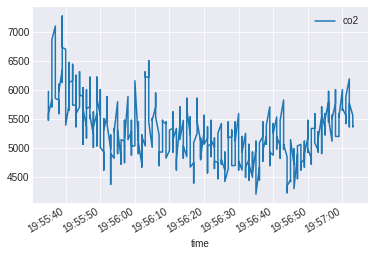

In [21]:
from matplotlib import pyplot

# Change the style of plot
pyplot.style.use('seaborn-darkgrid')
series.plot()
pyplot.show()

Desplegar los datos usando puntos en vez de unirlos con líneas

Hay una regularidad en eje X respecto a los ciclos del dióxido de carbono a largo del tiempo, sin embargo se observa altibajos en los niveles de CO2 registrados.

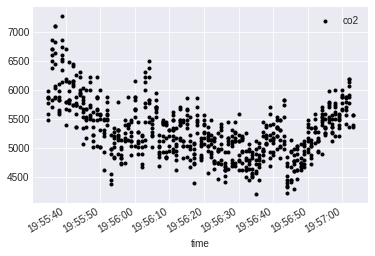

In [22]:
series.plot(style='k.')
pyplot.show()


En esta sección se realiza el análisis de la serie del tiempo para obtener la frecuencia respiratoria a partir del dióxido de carbono.

El análisis de la serie tiempo se realiza con el apoyo de la librería [HeartPy](https://readthedocs.org/projects/python-heart-rate-analysis-toolkit/downloads/pdf/latest/), Python Heart Rate Analysis Toolkit

In [24]:
#!pip install heartpy
import heartpy as hp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.7 MB/s 


Obtener la tasa de muestreo

In [28]:
series.index

DatetimeIndex(['2022-11-23 19:55:35', '2022-11-23 19:55:35',
               '2022-11-23 19:55:35', '2022-11-23 19:55:35',
               '2022-11-23 19:55:35', '2022-11-23 19:55:35',
               '2022-11-23 19:55:35', '2022-11-23 19:55:36',
               '2022-11-23 19:55:36', '2022-11-23 19:55:36',
               ...
               '2022-11-23 19:57:02', '2022-11-23 19:57:02',
               '2022-11-23 19:57:02', '2022-11-23 19:57:02',
               '2022-11-23 19:57:02', '2022-11-23 19:57:02',
               '2022-11-23 19:57:03', '2022-11-23 19:57:03',
               '2022-11-23 19:57:03', '2022-11-23 19:57:03'],
              dtype='datetime64[ns]', name='time', length=709, freq=None)

# Determinando la Frecuencia de muestreo

En esta seccion se determina la frecuencia de muestreo en Hertz a partir de los datosa partir de los datos..
Basado en este código en [Github](https://github.com/paulvangentcom/heartrate_analysis_python/blob/master/examples/3_smartwatch_data/Analysing_Smartwatch_Data.ipynb) 


In [38]:
sample_rate = hp.get_samplerate_datetime(timer, timeformat = '%m-%d-%Y %H:%M:%S')


print('sampling rate is: %.3f Hz' %sample_rate)

sampling rate is: 8.057 Hz


La frecuencia de muestreo es bastante baja, pero para conservar la energía, muchos dispositivos trabajan de este modo. Para determinar las BPM (*beats per minute*) está bien, pero cualquier medida de la variabilidad del ritmo  probablemente no va a ser muy precisa. Sin embargo, dependiendo de las necesidades, puede estar bien.

Una segunda consideración con la frecuencia de muestreo es determinar si es estable o no. Muchos dispositivos, incluidos los relojes inteligentes, hacen muchas cosas a la vez. Ejecutan un sistema operativo que tiene otras tareas además de la medición de la frecuencia cardíaca, por lo que cuando se mide a 10 Hz, el sistema operativo podría no estar listo exactamente cada 100 milisegundos para obtener una medición. Por ello, la frecuencia de muestreo puede variar.



# Determinando la estabilidad de muestreo del sensor



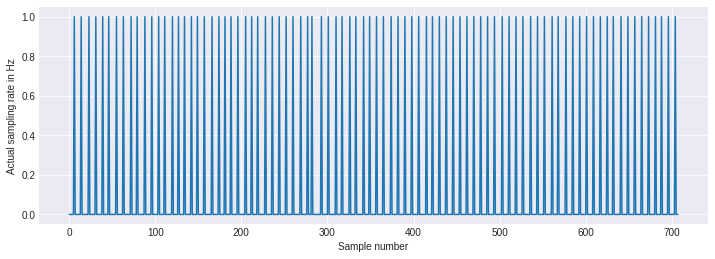

mean sampling rate: 0.124
median sampling rate: 0.000
standard deviation: 0.330


In [42]:
from datetime import datetime
import numpy as np

#let's create a list 'newtimer' to house our datetime objects
newtimer = [datetime.strptime(x, '%m-%d-%Y %H:%M:%S') for x in timer]

#let's compute the real distances from entry to entry
elapsed = []
for i in range(len(newtimer) - 1):
    ##elapsed.append(1 / ((newtimer[i+1] - newtimer[i]).seconds))
  elapsed.append(((newtimer[i+1] - newtimer[i]).seconds)) # resta los tiempos y luego calcula el número de segundos.
#and plot the results
pyplot.figure(figsize=(12,4))
pyplot.plot(elapsed)
pyplot.xlabel('Sample number')
pyplot.ylabel('Actual sampling rate in Hz')
pyplot.show()

print('mean sampling rate: %.3f' %np.mean(elapsed))
print('median sampling rate: %.3f'%np.median(elapsed))
print('standard deviation: %.3f'%np.std(elapsed))

Éste gráfico se obtiene restando dos mediciones contiguas. Se considera las unidades de tiempo de la muestra. Si estas coinciden entonces el resultado es cero, y si hay diferencia quiere decir que hubo un salto en la medición, que en este caso se toma como base unitaria el segundo. Al El rango en el eje está entre 0 y 1 y se deduce que a lo más hay una diferencia de un segundo en muestras contiguas, y que coincide con la unidad mínima de muestreo registrada, ya que no se tiene información acerca de los mili segundos.

En general este resultado parece razonable ya que no hay saltos de dos o más segundos en la toma de la muestra.

Al observar el eje X, si llega a la conclusión de que las muestras son bastante regulares. Hay algunos lugares, por ejemplo cerca de el muestreo número 300 donde se produce un pequeño retardo, pero estos retardos son excepcionales.

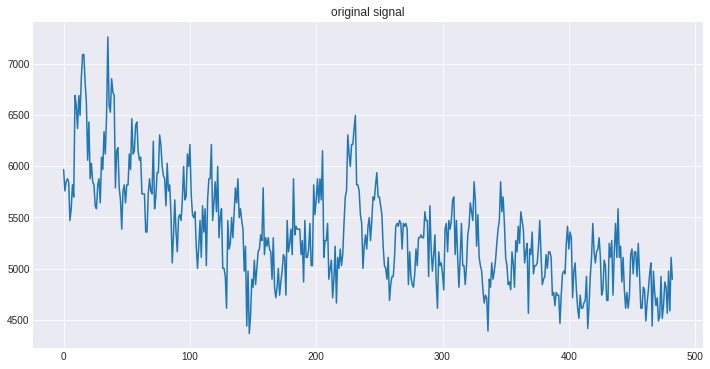

In [55]:
#Let's plot one minute of the segment we selected to get a view 
#of what we're working with
pyplot.figure(figsize=(12,6))
pyplot.plot(signal[0:int(60 * sample_rate)])
pyplot.title('original signal')
pyplot.show()